In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Load dataset
file = 'adult.data'
header = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','yearly income']
dataset=pd.read_csv(file,names=header,nrows = 5000)
dataset.head()
#lesson: download data from UCI repo instead of using url. move file to gjjim to avoid path confusion

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#already two labels >50k and <=50k. No need to change labels
#list(dataset.workclass).count(0)
#dataset.workclass

In [ ]:
#testing one hot encoding
# integer encode
label_encoder = LabelEncoder()
workclass_integer_encoded = label_encoder.fit_transform(dataset.workclass).reshape(-1, 1)
education_integer_encoded = label_encoder.fit_transform(dataset.education).reshape(len(education_integer_encoded), 1)
marital_integer_encoded = label_encoder.fit_transform(dataset.marital_status).reshape(len(marital_integer_encoded), 1)
occupation_integer_encoded = label_encoder.fit_transform(dataset.occupation).reshape(len(occupation_integer_encoded), 1)
relationship_integer_encoded = label_encoder.fit_transform(dataset.relationship).reshape(len(relationship_integer_encoded), 1)
race_integer_encoded = label_encoder.fit_transform(dataset.race).reshape(len(race_integer_encoded), 1)
sex_integer_encoded = label_encoder.fit_transform(dataset.sex).reshape(len(sex_integer_encoded), 1)
country_integer_encoded = label_encoder.fit_transform(dataset.native_country).reshape(len(country_integer_encoded), 1)
print(country_integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
#integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
workclass_hot = onehot_encoder.fit_transform(workclass_integer_encoded)
#education_hot = onehot_encoder.fit_transform(education_integer_encoded)
#dataset.marital_status = onehot_encoder.fit_transform(marital_integer_encoded)
#dataset.occupation = onehot_encoder.fit_transform(occupation_integer_encoded)
#dataset.relationship = onehot_encoder.fit_transform(relationship_integer_encoded)
#dataset.race = onehot_encoder.fit_transform(race_integer_encoded)
#dataset.sex = onehot_encoder.fit_transform(sex_integer_encoded)
#dataset.country= onehot_encoder.fit_transform(country_integer_encoded)
print(workclass_hot)
# invert first example
#inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
#print(inverted)

In [4]:
#np.hstack(dataset[:,[1,3,4,5,6,7,8,12]],workclass_hot)
# Get dummies
dataset_hot = pd.get_dummies(dataset, prefix_sep='_', drop_first=True)
# head
dataset_hot.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,yearly income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000
mean,38.600200,1.907684e+05,10.079600,1033.640200,93.696800,40.519000
std,13.594695,1.063596e+05,2.534906,7051.802077,410.801418,12.109193
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176958e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.794750e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.416575e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,2547.000000,99.000000


In [33]:
dataset_hot.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,yearly income_ >50K
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,38.600200,1.907684e+05,10.079600,1033.640200,93.696800,40.519000,0.029200,0.065800,0.687000,0.036400,...,0.003200,0.000200,0.001800,0.002000,0.000400,0.000800,0.893000,0.002000,0.000400,0.244200
std,13.594695,1.063596e+05,2.534906,7051.802077,410.801418,12.109193,0.168384,0.247957,0.463761,0.187302,...,0.056484,0.014142,0.042392,0.044681,0.019998,0.028276,0.309144,0.044681,0.019998,0.429655
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.176958e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,37.000000,1.794750e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,47.000000,2.416575e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,2547.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print(dataset.groupby('yearly income').size())

yearly income
 <=50K    3779
 >50K     1221
dtype: int64


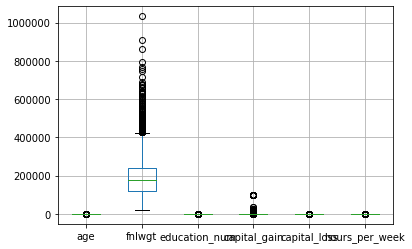

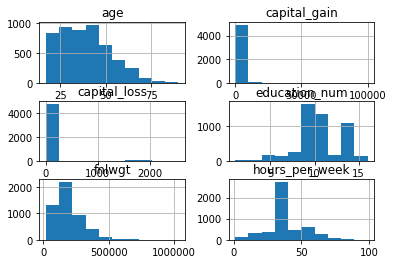

In [35]:
dataset.boxplot()
dataset.hist()
plt.show()

In [24]:
#rerun
#split data
array = dataset_hot.values
np.random.shuffle(array)
X = array[:,:-1]
Y = array[:,-1]
seed = 7
#np.random.seed(seed)
X_train_one,X_test_one,Y_train_one,Y_test_one = model_selection.train_test_split(X,Y,test_size=0.2)
X_train_two,X_test_two,Y_train_two,Y_test_two = model_selection.train_test_split(X,Y,test_size=0.5)
X_train_three,X_test_three,Y_train_three,Y_test_three = model_selection.train_test_split(X,Y,test_size=0.8)

#standardize
scaler_one = StandardScaler().fit(X_train_one)
rescaled_X_train_one = scaler_one.transform(X_train_one)

scaler_two = StandardScaler().fit(X_train_two)
rescaled_X_train_two = scaler_two.transform(X_train_two)

scaler_three = StandardScaler().fit(X_train_three)
rescaled_X_train_three = scaler_three.transform(X_train_three)

print(rescaled_X_train_one.shape,Y_train_one.shape)
print(rescaled_X_train_two.shape,Y_train_two.shape)
print(rescaled_X_train_three.shape,Y_train_three.shape)

partition = []
partition.append((rescaled_X_train_one,Y_train_one,'test size 0.2'))
partition.append((rescaled_X_train_two,Y_train_two, 'test size 0.5'))
partition.append((rescaled_X_train_three,Y_train_three, 'test size 0.8'))
print(partition[0][1])

valset = []
rescaled_X_val_one = scaler_one.transform(X_test_one)
rescaled_X_val_two = scaler_two.transform(X_test_two)
rescaled_X_val_three = scaler_three.transform(X_test_three)
valset.append((rescaled_X_val_one,Y_test_one,'test size 0.2'))
valset.append((rescaled_X_val_two,Y_test_two, 'test size 0.5'))
valset.append((rescaled_X_val_three,Y_test_three, 'test size 0.8'))

print((valset[0][0].shape,valset[0][1].shape))

(4000, 97) (4000,)
(2500, 97) (2500,)
(1000, 97) (1000,)
[0 0 1 ... 0 0 0]
((1000, 97), (1000,))


In [58]:
#PCA?
np.arange(0,5,1)

array([0, 1, 2, 3, 4])

In [ ]:
#correlation matrix
#fig,ax = plt.subplots()
#cax = ax.matshow(dataset.corr(),vmin=-1,vmax=1,interpolation='none')
#fig.colorbar(cax)
#ticks = np.arange(0,5,1)
#label = ['age','fnlwgt''capital_gain','capital_loss','hours_per_week']
#ax.set_xticks(ticks)
#ax.set_yticks(ticks)
#ax.set_xticklabels(label)
#ax.set_yticklabels(label)
#plt.show()

In [11]:
#try out models. Hard to rerun after reopening due to slowness.
estimators = []
#neural nets, bagging
estimators.append(('bagging',BaggingClassifier()))
#estimators.append(('neural',MLPClassifier()))
estimators.append(('XGB',xgb.XGBClassifier()))
estimators.append(('LR',LogisticRegression()))
estimators.append(('CART',DecisionTreeClassifier()))
estimators.append(('SVM',SVC()))
estimators.append(('KNN',KNeighborsClassifier()))
estimators.append(('LDA',LinearDiscriminantAnalysis()))
estimators.append(('NB',GaussianNB()))
estimators.append(('Ada',AdaBoostClassifier()))
estimators.append(('Grad',GradientBoostingClassifier()))
estimators.append(('Ran',RandomForestClassifier()))
estimators.append(('Extra',ExtraTreesClassifier()))
#ready = Pipeline(estimators)
results = []
results_name=[]
results_testsize = []
#results_nonscaled=[]
for name, model in estimators:
    for train in partition:
        kfold = model_selection.KFold(n_splits = 10)
        result = model_selection.cross_val_score(model, train[0],train[1],cv=kfold,scoring='accuracy')
        #result_nonscaled = model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
        results.append(result)
        #results_nonscaled.append(result_nonscaled)
        results_name.append(name)
        results_testsize.append(train[2])
        print("%s %s %f %f" % (name,train[2],result.mean(),result.std()))
        #print("%s %f %f" % (name,result_nonscaled.mean(),result_nonscaled.std()))

bagging test size 0.2 0.846130 0.006274
bagging test size 0.5 0.839681 0.006751
bagging test size 0.8 0.841984 0.013916
XGB test size 0.2 0.864327 0.007821
XGB test size 0.5 0.861057 0.006353
XGB test size 0.8 0.862253 0.010660


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LR test size 0.2 0.852042 0.007060


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LR test size 0.5 0.849754 0.006657


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LR test size 0.8 0.846281 0.013520
CART test size 0.2 0.813574 0.006736
CART test size 0.5 0.809828 0.008423
CART test size 0.8 0.810504 0.013885


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM test size 0.2 0.849124 0.008140


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM test size 0.5 0.844656 0.006170


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM test size 0.8 0.837987 0.017106
KNN test size 0.2 0.819640 0.005982
KNN test size 0.5 0.815971 0.007688
KNN test size 0.8 0.811884 0.014998


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-package

LDA test size 0.2 0.841600 0.009582


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-package

LDA test size 0.5 0.838452 0.010657


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-package

LDA test size 0.8 0.835068 0.015416
NB test size 0.2 0.471049 0.042583
NB test size 0.5 0.396069 0.025854
NB test size 0.8 0.334304 0.030719
Ada test size 0.2 0.861141 0.007581
Ada test size 0.5 0.858108 0.005834
Ada test size 0.8 0.854421 0.011751
Grad test size 0.2 0.865901 0.007043
Grad test size 0.5 0.861855 0.005626
Grad test size 0.8 0.860257 0.011260


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

Ran test size 0.2 0.848702 0.006812


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

Ran test size 0.5 0.842015 0.004570


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

Ran test size 0.8 0.835991 0.017799


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

Extra test size 0.2 0.830888 0.007459


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

Extra test size 0.5 0.825369 0.005730


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

Extra test size 0.8 0.812349 0.013013


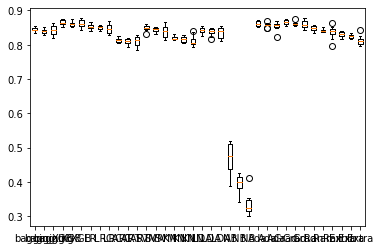

In [12]:
fig,ax = plt.subplots()
ax.boxplot(results)
ax.set_xticklabels(results_name+results_testsize)
plt.show()

In [15]:
#the best model is GradientBoosting with test size as 0.2 and average accuracy of 0.865901
print(results[0].mean())

0.8461303295387873


In [20]:
#tuning param for gradient boosting
loss = ['ls','lad', 'huber', 'quantile']
learning = [0.01,0.05,0.1,0.15,0.2]
max_depth = [3,5,7]
max_features = ['auto','log2','sqrt']
subsample = [0.5,0.75,1]
param_grid = dict( learning_rate = learning, max_depth=max_depth,max_features=max_features,subsample=subsample)
model_tuning = GradientBoostingClassifier()
grid = GridSearchCV(model_tuning,param_grid,scoring='accuracy',cv=2)
grid_result = grid.fit(rescaled_X_train_one, Y_train_one)
#print(grid_result.grid_scores_)
print(grid_result.best_params_,grid_result.best_score_)
#didn't succeed. Takes forever to run. maybe due to too many attributes. solution?

KeyboardInterrupt: 

In [7]:
#select a few models from the class list: xgboost, svm, randomforest,decision tree, KNN, Logistic regression
#lists of hyperparameters to try out for each model

#SVM:
#kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
#C = [0.1,1,10,100,1000]

#Xgboost
#reg_alpha= [0, 0.5, 1]
#reg_lambda= [1, 2,3]
#colsample_bytree = [0.3, 0.6, 0.8, 1.0]
#learning = [0.01,0.05,0.1,0.15,0.2]
#XG_max_depth = [3,5,7]
#min_child_weight = [1,3,5]
#gamma = [0.01,0.1,0.5,1,2]
#XG_max_features = ['auto','log2','sqrt']
#subsample = [0.1,0.5,0.75,1]
#XG_n_estimators= [100, 250, 500, 1000]

#random forest
#RF_n_estimators = [10,100,1000]
#max_features = ['auto','log2','sqrt']
#RF_max_depth = [10,50,100]
#RF_min_samples_split = [2, 5, 10]
#RF_min_samples_leaf = [1, 2, 4]

#DecisionTree
#criterion = ['gini', 'entropy']
#splitter = ['best','random']
#DT_max_depth = [None,4,8,12]
#DT_min_samples_split = [2,5,10]
#DT_min_samples_leaf = [1,2,4]
#DT_max_features = ['auto','log2','sqrt']

#KNN
#KNN = {'n_neighbors':[1,5,10], 'weights':['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

#logistic regression
#C=[0.01,0.1,1,10,100,1000]
#SVM:
svm = {'C': [0.1,1,10,100,1000]}#'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'C': [0.1,1,10,100,1000]}

#Xgboost
xgboost = {'max_depth': [1,3,5,7,10],'gamma': [0.01,0.1,0.5,1,2]}#'reg_alpha': [0, 0.5, 1],'reg_lambda': [1, 2,3],'colsample_bytree': [0.3, 0.6, 0.8, 1.0],
       #'learning_rate': [0.01,0.05,0.1,0.2],#'min_child_weight': [1,3,5],
       #,'max_features': ['auto','log2','sqrt'],'subsample': [0.1,0.5,0.75,1],
       #'n_estimators': [100, 250, 500, 1000]}

#random forest
RF = {'max_depth': [10,50,100]}#'n_estimators': [10,100,1000],'max_features': ['auto','log2','sqrt']}
      #'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

#DecisionTree
DT = {'max_depth': [None,4,8,12]}#'criterion': ['gini', 'entropy'],'splitter': ['best','random'],'max_depth': [None,4,8,12],
      #'min_samples_split': [2,5,10],'min_samples_leaf':[1,2,4],'max_features': ['auto','log2','sqrt']}

#KNN
KNN = {'n_neighbors':[1,5,10]}#, 'weights':['uniform','distance']}#,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

#logistic regression
LR = {'C':[0.01,0.1,1,10,100,1000]}

estimators = []
estimators.append(('xgb',xgboost,xgb.XGBClassifier()))
estimators.append(('LR',LR,LogisticRegression()))
estimators.append(('DT',DT,DecisionTreeClassifier()))
estimators.append(('SVM',svm,SVC()))
estimators.append(('KNN',KNN,KNeighborsClassifier()))
estimators.append(('RF',RF,RandomForestClassifier()))
results = []
results_name=[]
results_testsize = []
param_list = []

In [8]:
validation=[]

In [25]:
#rerun
param_list=[]
for train in partition:
    #for i in range(3):
    for name,param_grid,model in estimators:
        kfold = model_selection.KFold(n_splits = 5)
        grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = "accuracy",cv = kfold, return_train_score=True)
        grid_result = grid.fit(train[0],train[1])
        results.append((grid_result,grid_result.best_params_,grid_result.best_score_))
        results_name.append(name)
        results_testsize.append(train[2])
        print(name,grid_result.best_params_,grid_result.best_score_,train[2])
        validation.append((name,grid_result.best_score_,train[2]))
        param_list.append(grid_result.best_params_)

xgb {'gamma': 0.5, 'max_depth': 5} 0.8645 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LR {'C': 0.1} 0.845 test size 0.2
DT {'max_depth': 8} 0.83975 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM {'C': 1} 0.84175 test size 0.2
KNN {'n_neighbors': 10} 0.81675 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

RF {'max_depth': 10} 0.8445 test size 0.2
xgb {'gamma': 2, 'max_depth': 5} 0.8524 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LR {'C': 10} 0.8352 test size 0.5
DT {'max_depth': 4} 0.8324 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM {'C': 1} 0.8244 test size 0.5
KNN {'n_neighbors': 10} 0.8048 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

RF {'max_depth': 10} 0.8328 test size 0.5
xgb {'gamma': 0.1, 'max_depth': 3} 0.854 test size 0.8


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LR {'C': 0.01} 0.827 test size 0.8
DT {'max_depth': 4} 0.836 test size 0.8


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 1} 0.841 test size 0.8
KNN {'n_neighbors': 10} 0.814 test size 0.8


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

RF {'max_depth': 10} 0.839 test size 0.8


In [26]:
param_list

[{'gamma': 0.5, 'max_depth': 5},
 {'C': 0.1},
 {'max_depth': 8},
 {'C': 1},
 {'n_neighbors': 10},
 {'max_depth': 10},
 {'gamma': 2, 'max_depth': 5},
 {'C': 10},
 {'max_depth': 4},
 {'C': 1},
 {'n_neighbors': 10},
 {'max_depth': 10},
 {'gamma': 0.1, 'max_depth': 3},
 {'C': 0.01},
 {'max_depth': 4},
 {'C': 1},
 {'n_neighbors': 10},
 {'max_depth': 10}]

In [11]:
final_result_p1=[]
final_result_p2=[]
final_result_p3=[]


In [32]:
#rerun
temp=[]
best_xgb=[]
best_LR=[]
best_DT=[]
best_SVM=[]
best_KNN=[]
best_RF=[]

In [31]:
final_result_p1=final_result_p1[:12]
final_result_p2=final_result_p2[:12]
final_result_p3=final_result_p3[:12]

In [33]:
#rerun
best_xgb.append(xgb.XGBClassifier(gamma = 0.5,max_depth=5))
best_xgb.append(xgb.XGBClassifier(gamma = 2,max_depth=5))
best_xgb.append(xgb.XGBClassifier(gamma = 0.1,max_depth=3))
temp=[]
count=0
for train in partition:        
    best_fit = best_xgb[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1

final_result_p1.append(('xgb',temp[0][0],validation[0][1],temp[0][1]))
final_result_p2.append(('xgb',temp[1][0],validation[6][1],temp[1][1]))
final_result_p3.append(('xgb',temp[2][0],validation[12][1],temp[2][1]))

best_LR.append(LogisticRegression(C=0.1))
best_LR.append(LogisticRegression(C=10))
best_LR.append(LogisticRegression(C=0.01))
count=0
temp = []
for train in partition:        
    best_fit = best_LR[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('LR',temp[0][0],validation[1][1],temp[0][1]))
final_result_p2.append(('LR',temp[1][0],validation[7][1],temp[1][1]))
final_result_p3.append(('LR',temp[2][0],validation[13][1],temp[2][1]))


best_DT.append(DecisionTreeClassifier(max_depth=8))
best_DT.append(DecisionTreeClassifier(max_depth=4))
best_DT.append(DecisionTreeClassifier(max_depth=4))
count=0
temp = []
for train in partition:        
    best_fit = best_DT[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('DT',temp[0][0],validation[2][1],temp[0][1]))
final_result_p2.append(('DT',temp[1][0],validation[8][1],temp[1][1]))
final_result_p3.append(('DT',temp[2][0],validation[14][1],temp[2][1]))

best_SVM.append(SVC(C=1))
best_SVM.append(SVC(C=1))
best_SVM.append(SVC(C=1))
count=0
temp = []
for train in partition:        
    best_fit = best_SVM[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('SVM',temp[0][0],validation[3][1],temp[0][1]))
final_result_p2.append(('SVM',temp[1][0],validation[9][1],temp[1][1]))
final_result_p3.append(('SVM',temp[2][0],validation[15][1],temp[2][1]))

best_KNN.append(KNeighborsClassifier(n_neighbors=10))
best_KNN.append(KNeighborsClassifier(n_neighbors=10))
best_KNN.append(KNeighborsClassifier(n_neighbors=10))
count=0
temp = []
for train in partition:        
    best_fit = best_KNN[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('KNN',temp[0][0],validation[4][1],temp[0][1]))
final_result_p2.append(('KNN',temp[1][0],validation[10][1],temp[1][1]))
final_result_p3.append(('KNN',temp[2][0],validation[16][1],temp[2][1]))

best_RF.append(RandomForestClassifier(max_depth=10))
best_RF.append(RandomForestClassifier(max_depth=10))
best_RF.append(RandomForestClassifier(max_depth=10))
count=0
temp = []
for train in partition:        
    best_fit = best_RF[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('RF',temp[0][0],validation[5][1],temp[0][1]))
final_result_p2.append(('RF',temp[1][0],validation[11][1],temp[1][1]))
final_result_p3.append(('RF',temp[2][0],validation[17][1],temp[2][1]))

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warni

In [34]:
train_acc_p1=[]
val_acc_p1=[]
test_acc_p1=[]
for i in range(6):
    train_acc_p1.append(((final_result_p1[i][1]+final_result_p1[i+6][1]+final_result_p1[i+12][1])/3,
                        np.std(np.array([final_result_p1[i][1],final_result_p1[i+6][1],final_result_p1[i+12][1]]))))
    val_acc_p1.append(((final_result_p1[i][2]+final_result_p1[i+6][2]+final_result_p1[i+12][2])/3,
                     np.std(np.array([final_result_p1[i][2],final_result_p1[i+6][2],final_result_p1[i+12][2]]))))
    test_acc_p1.append(((final_result_p1[i][3]+final_result_p1[i+6][3]+final_result_p1[i+12][3])/3,
                      np.std(np.array([final_result_p1[i][3],final_result_p1[i+6][3],final_result_p1[i+12][3]]))))
train_acc_p2=[]
val_acc_p2=[]
test_acc_p2=[]    
for i in range(6):
    train_acc_p2.append(((final_result_p2[i][1]+final_result_p2[i+6][1]+final_result_p2[i+12][1])/3,
                        np.std(np.array([final_result_p2[i][1],final_result_p2[i+6][1],final_result_p2[i+12][1]]))))
    val_acc_p2.append(((final_result_p2[i][2]+final_result_p2[i+6][2]+final_result_p2[i+12][2])/3,
                     np.std(np.array([final_result_p2[i][2],final_result_p2[i+6][2],final_result_p2[i+12][2]]))))
    test_acc_p2.append(((final_result_p2[i][3]+final_result_p2[i+6][3]+final_result_p2[i+12][3])/3,
                      np.std(np.array([final_result_p2[i][3],final_result_p2[i+6][3],final_result_p2[i+12][3]]))))
    
train_acc_p3=[]
val_acc_p3=[]
test_acc_p3=[]    
for i in range(6):
    train_acc_p3.append(((final_result_p3[i][1]+final_result_p3[i+6][1]+final_result_p3[i+12][1])/3,
                        np.std(np.array([final_result_p3[i][1],final_result_p3[i+6][1],final_result_p3[i+12][1]]))))
    val_acc_p3.append(((final_result_p3[i][2]+final_result_p3[i+6][2]+final_result_p3[i+12][2])/3,
                     np.std(np.array([final_result_p3[i][2],final_result_p3[i+6][2],final_result_p3[i+12][2]]))))
    test_acc_p3.append(((final_result_p3[i][3]+final_result_p3[i+6][3]+final_result_p3[i+12][3])/3,
                      np.std(np.array([final_result_p3[i][3],final_result_p3[i+6][3],final_result_p3[i+12][3]]))))

In [35]:
print(train_acc_p1)
print(val_acc_p1)
print(test_acc_p1)
print(train_acc_p2)
print(val_acc_p2)
print(test_acc_p2)
print(train_acc_p3)
print(val_acc_p3)
print(test_acc_p3)

[(0.9025, 0.0030069364254448213), (0.8519166666666665, 0.0031247222098754156), (0.8599166666666666, 0.010137252531573321), (0.8654166666666666, 0.0034298526045427676), (0.8436666666666667, 0.0031776126608229474), (0.8740833333333334, 0.004360491817317034)]
[(0.8575, 0.0), (0.84225, 0.0), (0.8365, 0.0), (0.834, 0.0), (0.8039999999999999, 1.1102230246251565e-16), (0.8395, 0.0)]
[(0.8649999999999999, 0.010614455552060448), (0.8453333333333334, 0.013912424503139483), (0.842, 0.012569805089976547), (0.8383333333333333, 0.015107025591499559), (0.8083333333333332, 0.01040299102288478), (0.85, 0.005715476066494087)]
[(0.8841333333333333, 0.004576267280461445), (0.8561333333333332, 0.0024513035081133666), (0.8454666666666667, 0.004913473539383546), (0.87, 0.0035327043465311647), (0.8426666666666667, 0.004988876515698593), (0.8797333333333333, 0.002659991645767999)]
[(0.8548, 0.0), (0.8363999999999999, 1.1102230246251565e-16), (0.8428, 0.0), (0.8228, 0.0), (0.8012, 0.0), (0.8376, 0.0)]
[(0.85373

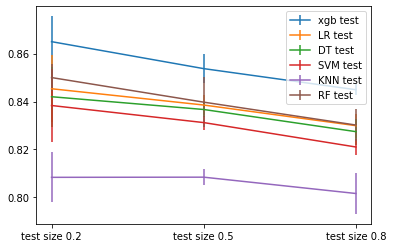

In [36]:
fig = plt.figure()
plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[0][0],test_acc_p2[0][0],test_acc_p3[0][0]]
             , yerr=[test_acc_p1[0][1],test_acc_p2[0][1],test_acc_p3[0][1]],label='xgb test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[1][0],test_acc_p2[1][0],test_acc_p3[1][0]]
             , yerr=[test_acc_p1[1][1],test_acc_p2[1][1],test_acc_p3[1][1]],label='LR test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[2][0],test_acc_p2[2][0],test_acc_p3[2][0]]
             , yerr=[test_acc_p1[2][1],test_acc_p2[2][1],test_acc_p3[2][1]],label='DT test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[3][0],test_acc_p2[3][0],test_acc_p3[3][0]]
             , yerr=[test_acc_p1[3][1],test_acc_p2[3][1],test_acc_p3[3][1]],label='SVM test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[4][0],test_acc_p2[4][0],test_acc_p3[4][0]]
             , yerr=[test_acc_p1[4][1],test_acc_p2[4][1],test_acc_p3[4][1]],label='KNN test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[5][0],test_acc_p2[5][0],test_acc_p3[5][0]]
             , yerr=[test_acc_p1[5][1],test_acc_p2[5][1],test_acc_p3[5][1]],label='RF test')
plt.legend()
plt.show()


xgb {'gamma': 2, 'max_depth': 5} 0.862 test size 0.2
LR {'C': 1} 0.84625 test size 0.2
DT {'max_depth': 4} 0.84125 test size 0.2
SVM {'C': 1} 0.8375 test size 0.2
KNN {'n_neighbors': 10} 0.81 test size 0.2
RF {'max_depth': 10} 0.8455 test size 0.2

xgb {'gamma': 2, 'max_depth': 5} 0.862 test size 0.2
LR {'C': 1} 0.84625 test size 0.2
DT {'max_depth': 4} 0.8415 test size 0.2
SVM {'C': 1} 0.8375 test size 0.2
KNN {'n_neighbors': 10} 0.81 test size 0.2
RF {'max_depth': 10} 0.843 test size 0.2

xgb {'gamma': 2, 'max_depth': 5} 0.862 test size 0.2
LR {'C': 1} 0.84625 test size 0.2
DT {'max_depth': 4} 0.8415 test size 0.2
SVM {'C': 1} 0.8375 test size 0.2
KNN {'n_neighbors': 10} 0.81 test size 0.2
RF {'max_depth': 10} 0.84575 test size 0.2

In [15]:
# Draw the heatmap of training errors.
def draw_heatmap(training_errors, gamma_list, C_list, x_name, y_name, title):
    plt.figure(figsize = (5,5))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '%s'%(x_name), ylabel='%s'%(y_name))#'$\gamma$', ylabel='$C$')
    plt.title('Validation accuracy of %s' % (title))
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

In [16]:
# Draw the heatmap of training errors.
def draw_heatmap1d(training_errors, gamma_list, y_name,title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f', 
                     yticklabels=gamma_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set( ylabel='%s'%(y_name))#'$\gamma$', ylabel='$C$')
    plt.title('Validation accuracy of %s' % (title))
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()


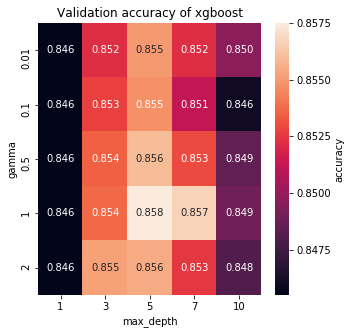

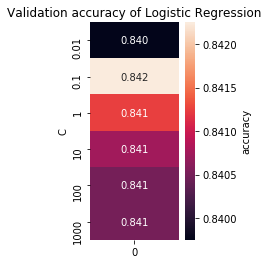

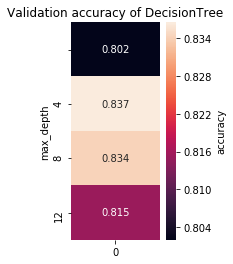

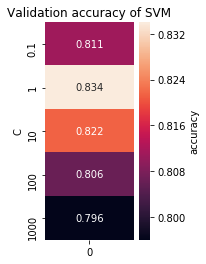

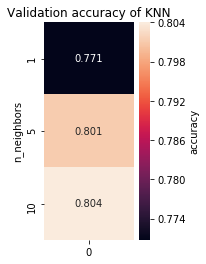

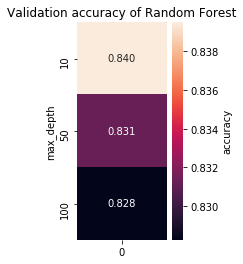

In [17]:
#Some examples of the heatmap
val_acc =np.reshape(results[0][0].cv_results_['mean_test_score'],(5,5))
draw_heatmap(val_acc,[1,3,5,7,10],[0.01,0.1,0.5,1,2],'max_depth','gamma','xgboost' )

val_acc =np.reshape(results[1][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[0.01,0.1,1,10,100,1000],'C','Logistic Regression')

val_acc =np.reshape(results[2][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[None,4,8,12],'max_depth','DecisionTree')

val_acc =np.reshape(results[3][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[0.1,1,10,100,1000],'C','SVM')

val_acc =np.reshape(results[4][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[1,5,10],'n_neighbors','KNN')

val_acc =np.reshape(results[5][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[10,50,100],'max_depth','Random Forest')

In [ ]:
#below is cv randomness

In [13]:
val_acc_xgb_p1 = (validation[0][1]+validation[6][1]+validation[12][1])/3
val_acc_xgb_p2 = (validation[18][1]+validation[24][1]+validation[30][1])/3
val_acc_xgb_p3 = (validation[36][1]+validation[42][1]+validation[48][1])/3

val_acc_LR_p1 = (validation[1][1]+validation[7][1]+validation[13][1])/3
val_acc_LR_p2 = (validation[19][1]+validation[25][1]+validation[31][1])/3
val_acc_LR_p3 = (validation[37][1]+validation[43][1]+validation[49][1])/3

val_acc_DT_p1 = (validation[2][1]+validation[8][1]+validation[14][1])/3
val_acc_DT_p2 = (validation[20][1]+validation[26][1]+validation[32][1])/3
val_acc_DT_p3 = (validation[38][1]+validation[44][1]+validation[50][1])/3

val_acc_SVM_p1 = (validation[3][1]+validation[9][1]+validation[15][1])/3
val_acc_SVM_p2 = (validation[21][1]+validation[27][1]+validation[33][1])/3
val_acc_SVM_p3 = (validation[39][1]+validation[45][1]+validation[51][1])/3

val_acc_KNN_p1 = (validation[4][1]+validation[10][1]+validation[16][1])/3
val_acc_KNN_p2 = (validation[22][1]+validation[28][1]+validation[34][1])/3
val_acc_KNN_p3 = (validation[40][1]+validation[46][1]+validation[52][1])/3

val_acc_RF_p1 = (validation[5][1]+validation[11][1]+validation[17][1])/3
val_acc_RF_p2 = (validation[23][1]+validation[29][1]+validation[35][1])/3
val_acc_RF_p3 = (validation[41][1]+validation[47][1]+validation[53][1])/3

In [14]:
valset = []
rescaled_X_val_one = scaler_one.transform(X_test_one)
rescaled_X_val_two = scaler_two.transform(X_test_two)
rescaled_X_val_three = scaler_three.transform(X_test_three)
valset.append((rescaled_X_val_one,Y_test_one,'test size 0.2'))
valset.append((rescaled_X_val_two,Y_test_two, 'test size 0.5'))
valset.append((rescaled_X_val_three,Y_test_three, 'test size 0.8'))

print((valset[0][0].shape,valset[0][1].shape))

((1000, 97), (1000,))


In [15]:
best = xgb.XGBClassifier(gamma = 2,max_depth=5)
#xgb_best_fit_result = []
xgb_loss = []
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
       # xgb_loss.append(best.evals_result())
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        #test_error = accuracy_score(best_fit.predict(data_test[:,:-1]),data_test[:,-1])
        temp.append((train_error, test_error))
    count = count+1

final_result_p1=[]
final_result_p2=[]
final_result_p3=[]
train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
#test_error_p1 = (temp[0][2]+temp[1][2]+temp[2][2])/3
#test_error_p2 = (temp[3][2]+temp[4][2]+temp[5][2])/3
#test_error_p3 = (temp[6][2]+temp[7][2]+temp[8][2])/3
final_result_p1.append(('xgb',train_error_p1,val_acc_xgb_p1,test_error_p1))
final_result_p2.append(('xgb',train_error_p2,val_acc_xgb_p2,test_error_p2))
final_result_p3.append(('xgb',train_error_p3,val_acc_xgb_p3,test_error_p3))

In [16]:
best = LogisticRegression(C=1)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('LR',train_error_p1,val_acc_LR_p1,test_error_p1))
final_result_p2.append(('LR',train_error_p2,val_acc_LR_p2,test_error_p2))
final_result_p3.append(('LR',train_error_p3,val_acc_LR_p3,test_error_p3))

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

In [17]:
best = DecisionTreeClassifier(max_depth=4)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('DT',train_error_p1,val_acc_DT_p1,test_error_p1))
final_result_p2.append(('DT',train_error_p2,val_acc_DT_p2,test_error_p2))
final_result_p3.append(('DT',train_error_p3,val_acc_DT_p3,test_error_p3))

In [18]:
best = SVC(C=1)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('SVM',train_error_p1,val_acc_SVM_p1,test_error_p1))
final_result_p2.append(('SVM',train_error_p2,val_acc_SVM_p2,test_error_p2))
final_result_p3.append(('SVM',train_error_p3,val_acc_SVM_p3,test_error_p3))

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

In [19]:
best = KNeighborsClassifier(n_neighbors=10)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('KNN',train_error_p1,val_acc_KNN_p1,test_error_p1))
final_result_p2.append(('KNN',train_error_p2,val_acc_KNN_p2,test_error_p2))
final_result_p3.append(('KNN',train_error_p3,val_acc_KNN_p3,test_error_p3))

In [20]:
best = RandomForestClassifier(max_depth=10)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('RF',train_error_p1,val_acc_RF_p1,test_error_p1))
final_result_p2.append(('RF',train_error_p2,val_acc_RF_p2,test_error_p2))
final_result_p3.append(('RF',train_error_p3,val_acc_RF_p3,test_error_p3))

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
final_result_p1

[('xgb', 0.8969999999999999, 0.862, 0.85),
 ('LR', 0.8545000000000001, 0.84625, 0.8370000000000001),
 ('DT', 0.8417499999999999, 0.8414166666666666, 0.831),
 ('SVM', 0.86875, 0.8375, 0.835),
 ('KNN', 0.8415, 0.81, 0.809),
 ('RF', 0.8770000000000001, 0.84475, 0.8393333333333333)]

In [35]:
table_p1 = pd.DataFrame(np.array(final_result_p1),columns=['classifier','train_accuracy', 'val_accuracy', 'test_accuracy'])
table_p2 = pd.DataFrame(np.array(final_result_p2),columns=['classifier','train_accuracy', 'val_accuracy', 'test_accuracy'])
table_p3 = pd.DataFrame(np.array(final_result_p3),columns=['classifier','train_accuracy', 'val_accuracy', 'test_accuracy'])
table_p1

,classifier,train_accuracy,val_accuracy,test_accuracy
0,xgb,0.8969999999999999,0.862,0.85
1,LR,0.8545000000000001,0.84625,0.8370000000000001
2,DT,0.8417499999999999,0.8414166666666666,0.831
3,SVM,0.86875,0.8375,0.835
4,KNN,0.8415,0.81,0.809
5,RF,0.8770000000000001,0.84475,0.8393333333333333


In [23]:
table_p2

,classifier,train_accuracy,val_accuracy,test_accuracy
0,xgb,0.9084,0.8548,0.8508
1,LR,0.8576,0.8412000000000001,0.8363999999999999
2,DT,0.8384,0.8373333333333334,0.8336
3,SVM,0.8704,0.8252,0.8312
4,KNN,0.8488000000000001,0.8064,0.8076
5,RF,0.8830666666666667,0.8385333333333334,0.8425333333333334


In [24]:
table_p3

,classifier,train_accuracy,val_accuracy,test_accuracy
0,xgb,0.908,0.855,0.851
1,LR,0.887,0.843,0.83275
2,DT,0.858,0.8380000000000001,0.8290833333333333
3,SVM,0.887,0.826,0.831
4,KNN,0.856,0.818,0.8075
5,RF,0.9136666666666667,0.8393333333333333,0.8331666666666666


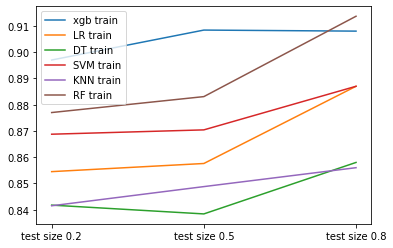

In [25]:
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[0][1],final_result_p2[0][1],final_result_p3[0][1]],label='xgb train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[1][1],final_result_p2[1][1],final_result_p3[1][1]],label='LR train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[2][1],final_result_p2[2][1],final_result_p3[2][1]],label='DT train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[3][1],final_result_p2[3][1],final_result_p3[3][1]],label='SVM train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[4][1],final_result_p2[4][1],final_result_p3[4][1]],label='KNN train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[5][1],final_result_p2[5][1],final_result_p3[5][1]],label='RF train')
plt.legend()
plt.show()

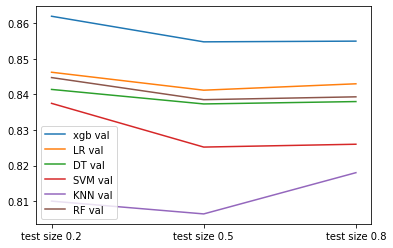

In [26]:
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[0][2],final_result_p2[0][2],final_result_p3[0][2]],label='xgb val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[1][2],final_result_p2[1][2],final_result_p3[1][2]],label='LR val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[2][2],final_result_p2[2][2],final_result_p3[2][2]],label='DT val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[3][2],final_result_p2[3][2],final_result_p3[3][2]],label='SVM val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[4][2],final_result_p2[4][2],final_result_p3[4][2]],label='KNN val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[5][2],final_result_p2[5][2],final_result_p3[5][2]],label='RF val')
plt.legend()
plt.show()

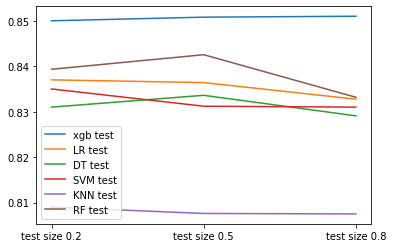

In [27]:
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[0][3],final_result_p2[0][3],final_result_p3[0][3]],label='xgb test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[1][3],final_result_p2[1][3],final_result_p3[1][3]],label='LR test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[2][3],final_result_p2[2][3],final_result_p3[2][3]],label='DT test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[3][3],final_result_p2[3][3],final_result_p3[3][3]],label='SVM test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[4][3],final_result_p2[4][3],final_result_p3[4][3]],label='KNN test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[5][3],final_result_p2[5][3],final_result_p3[5][3]],label='RF test')
plt.legend()
plt.show()
#error bar for std

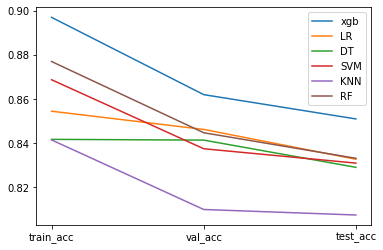

In [28]:
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[0][1],final_result_p1[0][2],final_result_p3[0][3]],label='xgb')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[1][1],final_result_p1[1][2],final_result_p3[1][3]],label='LR')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[2][1],final_result_p1[2][2],final_result_p3[2][3]],label='DT')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[3][1],final_result_p1[3][2],final_result_p3[3][3]],label='SVM')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[4][1],final_result_p1[4][2],final_result_p3[4][3]],label='KNN')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[5][1],final_result_p1[5][2],final_result_p3[5][3]],label='RF')
plt.legend()
plt.show()

In [ ]:
#try putting other models in boosting instead of using default DecisionTree?

In [ ]:
#